In [1]:
#https://algotrading101.com/learn/coingecko-api-guide
#https://github.com/man-c/pycoingecko
#https://www.coingecko.com/en/api/documentation

In [2]:
from pycoingecko import CoinGeckoAPI
import pandas as pd
import dataframe_image as dfi
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

/usr/local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
cg = CoinGeckoAPI()

In [4]:
coins = [ 'ETH', 'BNB', 'SOL', 'ADA', 'LUNA', 'AVAX', 'MATIC', 'ATOM', 'ALGO', 'NEAR', 'FTM', 'ONE' ]
coins = [x.lower() for x in coins]
df = pd.DataFrame(cg.get_coins_list())
#print(df.loc[df['symbol'].isin(coins)])
#print(df.loc[df['name'].isin(['Avalanche'])])
#print(df.loc[df['name'].isin(['Harmony'])])

In [5]:
coin_list = ['ethereum', 'cardano', 'solana']

## Summary

In [6]:
for coin in coin_list:
    print('\033[1m' + coin + '\033[0m')
    data = cg.get_coin_by_id(coin)
    text = data['description']['en']
    print(text.split('\r')[0])
    print('Link: '+ data['links']['homepage'][0])
    print()

ethereum
Ethereum is a global, open-source platform for decentralized applications. In other words, the vision is to create a world computer that anyone can build applications in a decentralized manner; while all states and data are distributed and publicly accessible. Ethereum supports smart contracts in which developers can write code in order to program digital value. Examples of decentralized apps (dapps) that are built on Ethereum includes tokens, non-fungible tokens, decentralized finance apps, lending protocol, decentralized exchanges, and much more.
Link: https://www.ethereum.org/

cardano

Link: https://www.cardano.org/en/home/

solana

Link: https://solana.com/



## Price Data

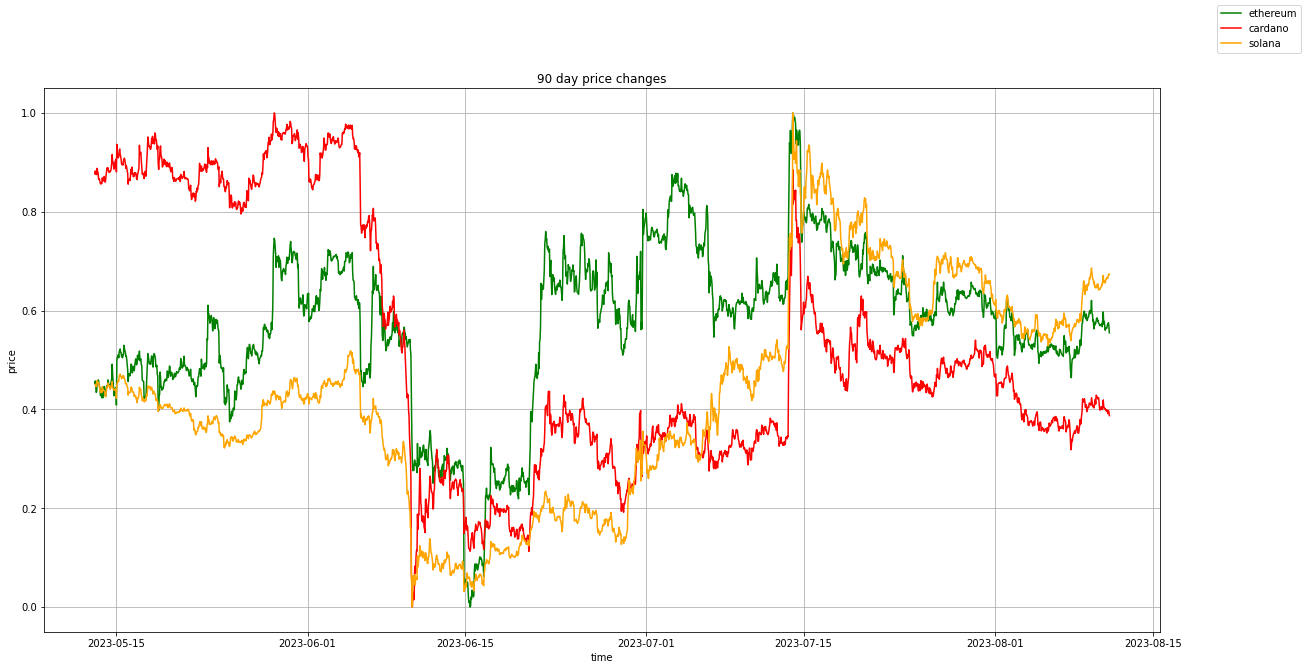

In [7]:
df = pd.DataFrame(columns=['time'])
dft = pd.DataFrame()

for coin in coin_list:
  dft = cg.get_coin_market_chart_by_id(id=coin,vs_currency='usd',days='90')
  dft = pd.DataFrame(dft['prices'], columns=['time',coin])
  dft['time'] = pd.to_datetime(dft['time'], unit='ms')
  dft['time'] = dft['time'].round('H')
  df = pd.merge(df, dft, on='time', how='outer')

df = df.sort_values(by=['time'])

scaler = MinMaxScaler()
df[coin_list] = scaler.fit_transform(df[coin_list])

fig, ax = plt.subplots(figsize=(20,10))
plt.title('90 day price changes')
ax.plot(df['time'], df[coin_list[0]], 'green', label=coin_list[0])
ax.set_xlabel('time')
ax.set_ylabel('price')
ax.set_yscale('linear')

count = 0
for coin in coin_list[1:]:
    colours = ['red', 'orange', 'yellow', 'blue', 'indigo', 'violet']
    ax.plot(df['time'], df[coin], colours[count], label=coin)
    count += 1

fig.legend(loc="upper right")
plt.grid(True)

plt.show()

### Price correlation matrix

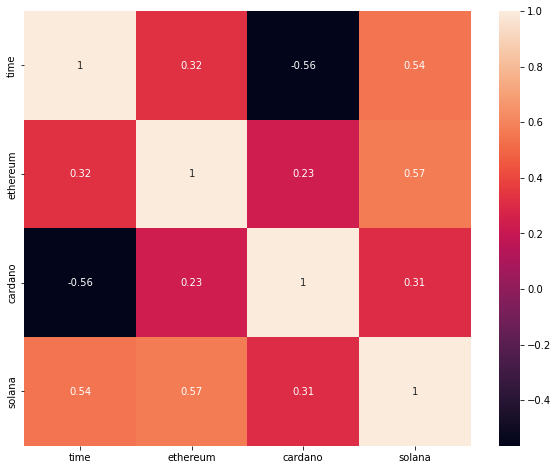

In [8]:
import seaborn as sns
heat = df.corr(method='pearson')
#heat = df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(heat, annot=True)
plt.show()

## Volume Data

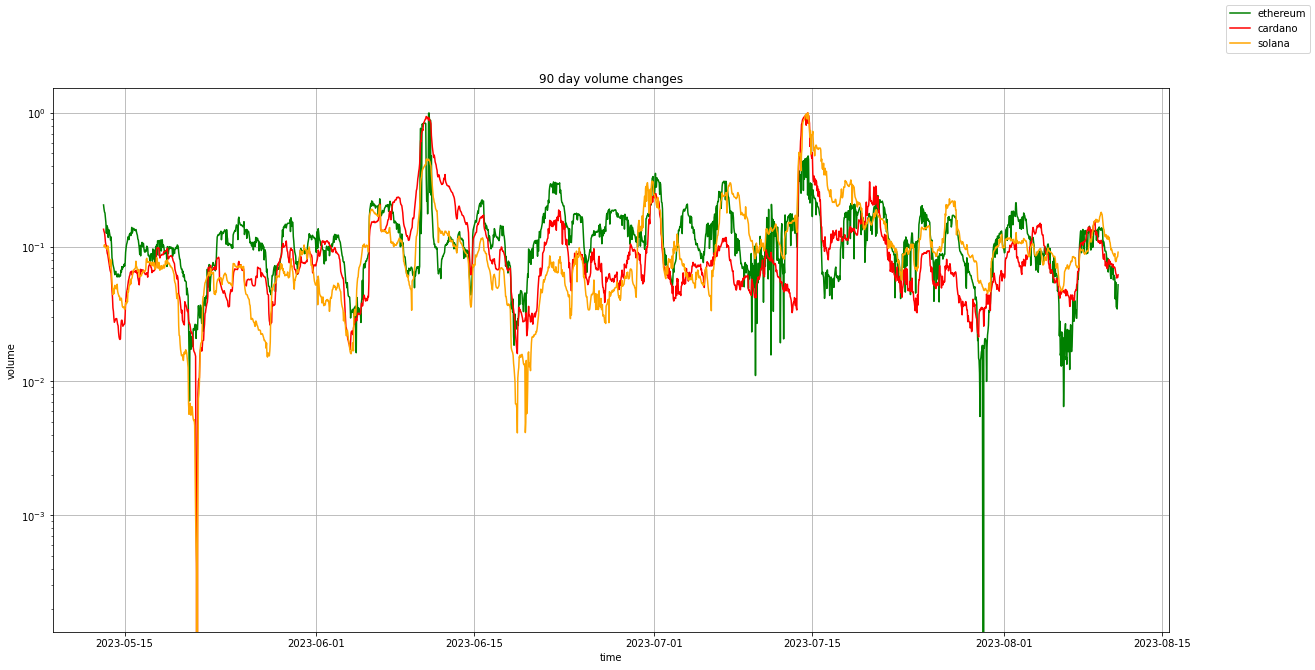

In [9]:
df = pd.DataFrame(columns=['time'])
dft = pd.DataFrame()

for coin in coin_list:
  dft = cg.get_coin_market_chart_by_id(id=coin,vs_currency='usd',days='90')
  dft = pd.DataFrame(dft['total_volumes'], columns=['time',coin])
  dft['time'] = pd.to_datetime(dft['time'], unit='ms')
  dft['time'] = dft['time'].round('H')
  df = pd.merge(df, dft, on='time', how='outer')

df = df.sort_values(by=['time'])

scaler = MinMaxScaler()
df[coin_list] = scaler.fit_transform(df[coin_list])

fig, ax = plt.subplots(figsize=(20,10))
plt.title('90 day volume changes')
ax.plot(df['time'], df[coin_list[0]], 'green', label=coin_list[0])
ax.set_xlabel('time')
ax.set_ylabel('volume')
ax.set_yscale('log')

count = 0
for coin in coin_list[1:]:
    colours = ['red', 'orange', 'yellow', 'blue', 'indigo', 'violet']
    ax.plot(df['time'], df[coin], colours[count], label=coin)
    count += 1

fig.legend(loc="upper right")
plt.grid(True)

plt.show()

### Volume correlation matrix

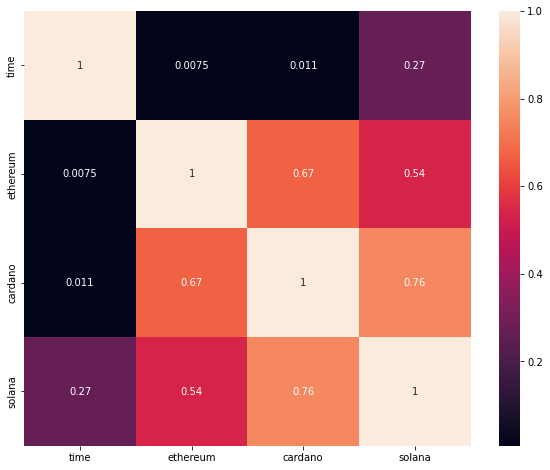

In [10]:
import seaborn as sns
heat = df.corr(method='pearson')
#heat = df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(heat, annot=True)
plt.show()

## Exchanges Data

ValueError: Could not save to JPEG for display

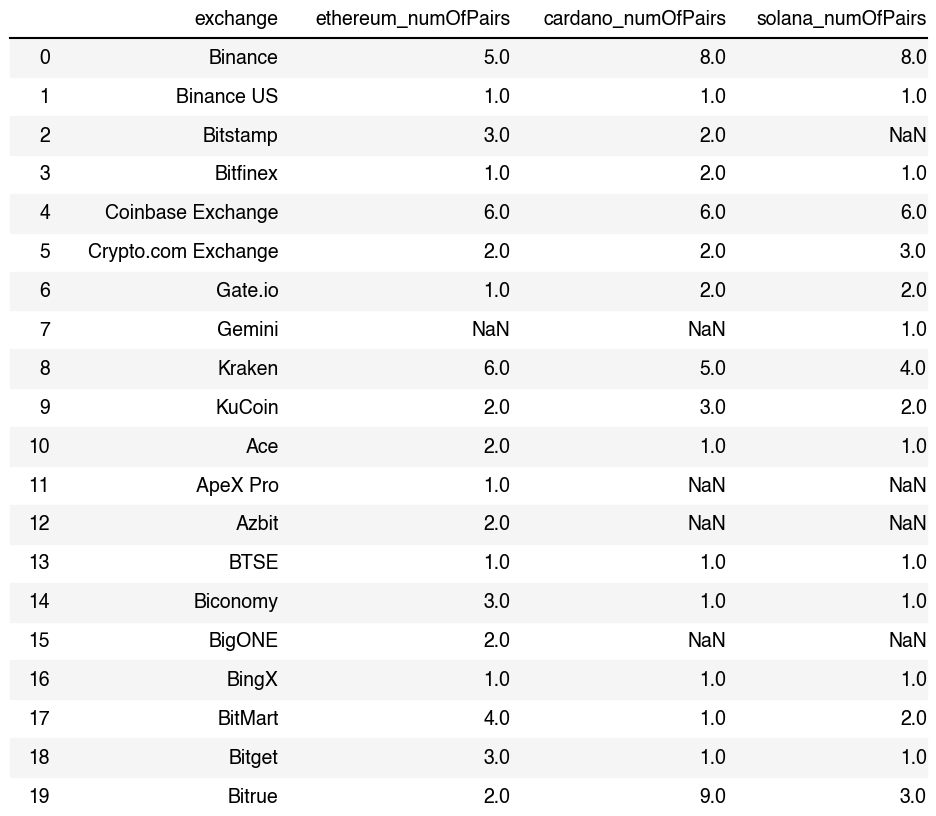

In [11]:
df = pd.DataFrame(columns=['exchange'])

for coin in coin_list:
    data = cg.get_coin_by_id(coin)
    ex = pd.DataFrame(data['tickers'])
    lst = []
    for i in range(ex['market'].count()):
        lst.append(ex['market'][i]['name'])
    
    ex['exchange'] = lst
    ex = ex.groupby(['exchange']).size().to_frame(coin + '_numOfPairs')
    df = pd.merge(df, ex, on='exchange', how='outer')
    
def tm_sorter(column):
    """Sort function"""
    teams = ['Binance', 'Binance US', 'Bitstamp','Bitfinex','Bittrex','Coinbase Exchange','Crypto.com Exchange','FTX',
            'Gate.io', 'Gemini', 'Huobi Global', 'Huobi Korea', 'Kraken', 'KuCoin', 'OKEx', 'Poloniex', 'Uniswap (v3)',
            'Upbit']
    correspondence = {team: order for order, team in enumerate(teams)}
    return column.map(correspondence)

df = df.sort_values(by='exchange', key=tm_sorter)
df.reset_index(drop=True, inplace=True)
df = df.head(20)

fname = "/tmp/ex_table.png"
dfi.export(df,fname,table_conversion="chrome '--crash-dumps-dir=/tmp'")
display(Image.open(fname))

## Financial Data

ValueError: Could not save to JPEG for display

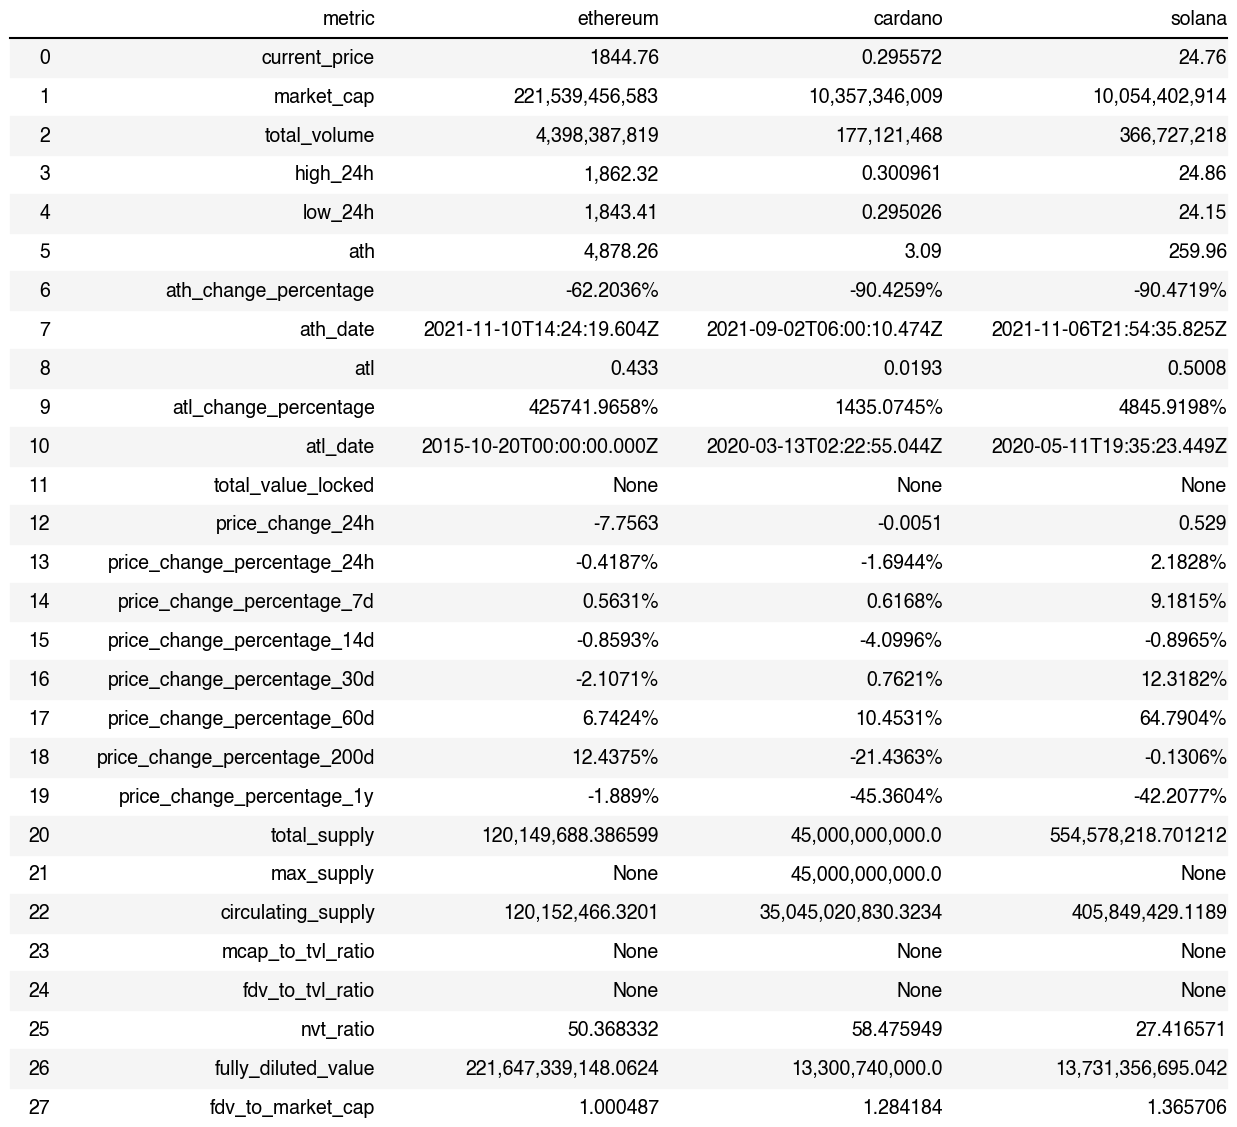

In [12]:
keys = ['current_price','market_cap','total_volume','high_24h','low_24h','ath','ath_change_percentage','ath_date','atl','atl_change_percentage','atl_date','total_value_locked']
keys2 = keys + ['price_change_24h','price_change_percentage_24h','price_change_percentage_7d','price_change_percentage_14d','price_change_percentage_30d','price_change_percentage_60d','price_change_percentage_200d','price_change_percentage_1y','total_supply','max_supply','circulating_supply','mcap_to_tvl_ratio','fdv_to_tvl_ratio']
addRound = ['ath_change_percentage', 'atl', 'atl_change_percentage', 'price_change_24h','price_change_percentage_24h','price_change_percentage_7d','price_change_percentage_14d','price_change_percentage_30d','price_change_percentage_60d','price_change_percentage_200d','price_change_percentage_1y', 'circulating_supply', 'fully_diluted_value']
addSeperator = ['market_cap','total_volume','high_24h','low_24h','ath','atl','price_change_24h','total_supply','max_supply','circulating_supply','fully_diluted_value']
addPercent = ['ath_change_percentage', 'atl_change_percentage', 'price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']
df = pd.DataFrame(columns=['metric'])

for coin in coin_list:
    data = cg.get_coin_by_id(coin)
    md = data['market_data']
    for i in keys:
        r = md[i]
        if isinstance(r, dict):
            md[i] = r['usd']
        else:
            md[i] = r
    dic = {key: md[key] for key in keys2}
    dic['nvt_ratio'] = dic['market_cap'] / dic['total_volume']
    dic['fully_diluted_value'] = dic['current_price'] * dic['total_supply'] if dic['total_supply'] is not None else 0
    dic['fdv_to_market_cap'] = dic['fully_diluted_value'] / dic['market_cap']
    for c in addRound:
        dic[c] = round(dic[c], 4)
    for c in addSeperator:
        try:
            dic[c] = format(dic[c],",")
        except:
            pass
    for c in addPercent:
        dic[c] = str(dic[c])+'%'
    dft = pd.DataFrame(list(dic.items()), columns=['metric', coin])
    df = pd.merge(df, dft, on='metric', how='outer')

   
fname = "/tmp/md_table.png"
dfi.export(df,fname,table_conversion="chrome '--crash-dumps-dir=/tmp'")
display(Image.open(fname))

## Ratings Data

In [13]:
keys = ['sentiment_votes_up_percentage','sentiment_votes_down_percentage','coingecko_rank','coingecko_score','developer_score','community_score','liquidity_score','public_interest_score']
addRound = keys
addPercent = ['sentiment_votes_up_percentage', 'sentiment_votes_down_percentage']

df = pd.DataFrame(columns=['metric'])

for coin in coin_list:
    data = cg.get_coin_by_id(coin)
    dic = {key: data[key] for key in keys}
    for c in addRound:
        dic[c] = round(dic[c], 2)
    for c in addPercent:
        dic[c] = str(dic[c])+'%'
    dft = pd.DataFrame(list(dic.items()), columns=['metric', coin])
    df = pd.merge(df, dft, on='metric', how='outer')

fname = "/tmp/rating_table.png"
dfi.export(df,fname,table_conversion="chrome '--crash-dumps-dir=/tmp'")
display(Image.open(fname))

ValueError: {'status': {'error_code': 429, 'error_message': "You've exceeded the Rate Limit. Please visit https://www.coingecko.com/en/api/pricing to subscribe to our API plans for higher rate limits."}}

## Community Data

In [ ]:
keys = ['facebook_likes','twitter_followers','reddit_average_posts_48h','reddit_average_comments_48h','reddit_subscribers','reddit_accounts_active_48h','telegram_channel_user_count']
addRound = ['reddit_average_posts_48h','reddit_average_comments_48h','reddit_subscribers','reddit_accounts_active_48h']
addSeperator = keys

df = pd.DataFrame(columns=['metric'])

for coin in coin_list:
    data = cg.get_coin_by_id(coin)
    com = data['community_data']
    dic = {key: com[key] for key in keys}
    for c in addRound:
        dic[c] = round(dic[c], 2)
    for c in addSeperator:
        try:
            dic[c] = format(dic[c],",")
        except:
            pass
    dft = pd.DataFrame(list(dic.items()), columns=['metric', coin])
    df = pd.merge(df, dft, on='metric', how='outer')
    
fname = "/tmp/community_table.png"
dfi.export(df,fname,table_conversion="chrome '--crash-dumps-dir=/tmp'")
display(Image.open(fname))

## Developer Data

In [ ]:
keys = ['forks','stars','subscribers','total_issues','closed_issues','pull_requests_merged','pull_request_contributors','commit_count_4_weeks']
addRound = ['closed_issues_%']
addSeperator = keys

df = pd.DataFrame(columns=['metric'])

for coin in coin_list:
    data = cg.get_coin_by_id(coin)
    dev = data['developer_data']
    dic = {key: dev[key] for key in keys}
    dic['closed_issues_%'] = 100 * dic['closed_issues'] / dic['total_issues']
    for c in addRound:
        dic[c] = round(dic[c], 2)
    for c in addSeperator:
        try:
            dic[c] = format(dic[c],",")
        except:
            pass
    dft = pd.DataFrame(list(dic.items()), columns=['metric', coin])
    df = pd.merge(df, dft, on='metric', how='outer')
    
fname = "/tmp/developer_table.png"
dfi.export(df,fname,table_conversion="chrome '--crash-dumps-dir=/tmp'")
display(Image.open(fname))